In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = selected_features = df.drop(columns=["koi_disposition"])

# Create a Train Test Split

Use `koi_disposition` for the y values

<div style="height:auto;background-color:pink;border:2px solid;"> 
    <h2 style="text-align:center;color:orange;">NOTES:</h2>
    <ul> 
        <li>Since our Y values will be in the categorical forma we will need to convert this to numbers(enconding)</li> 
        <li>This Encoded values will be in ordinal format [0,1,2]</li> 
    </ul>
</div>

<h4 style="color:blue;">Converting Categorical Data(target) Numerical -- Encoding</h4>

In [6]:
# Target Values
y = df['koi_disposition'].astype('category').cat.codes

###### Encoded Categories

In [7]:
pd.DataFrame({'Category':df['koi_disposition'],'Encoded':y}).value_counts()

Category        Encoded
FALSE POSITIVE  2          3504
CONFIRMED       1          1800
CANDIDATE       0          1687
dtype: int64

In [8]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,stratify=y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6743,0,1,0,0,1.721314,1.950000e-07,-1.950000e-07,132.531896,0.000094,-0.000094,...,-196,4.371,0.124,-0.186,1.073,0.316,-0.170,289.74515,45.187160,15.187
1510,0,0,1,0,1.087491,1.730000e-06,-1.730000e-06,131.770340,0.001370,-0.001370,...,-187,3.594,0.360,-0.120,3.204,0.594,-1.287,297.85938,40.326939,13.214
360,0,0,0,0,16.568068,5.230000e-05,-5.230000e-05,146.152850,0.002310,-0.002310,...,-80,4.602,0.024,-0.038,0.716,0.040,-0.032,292.46976,37.567791,15.391
5462,1,0,0,0,2.500128,4.010000e-05,-4.010000e-05,131.582900,0.018100,-0.018100,...,-227,4.120,0.172,-0.172,1.664,0.864,-0.411,295.38477,49.333672,11.270
5780,0,1,1,1,2.245721,2.340000e-05,-2.340000e-05,133.266780,0.009480,-0.009480,...,-214,4.455,0.052,-0.195,1.026,0.302,-0.108,292.69376,42.760899,14.244


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
from sklearn.preprocessing import MinMaxScaler  #importing MinMaxScaler, scaling data from [0-1]
def scale_minmax(X_values):
    return MinMaxScaler().fit(X_values)

In [11]:
# creating the scaler instance
min_max_scaler = scale_minmax(X_train)

In [12]:
X_train_scaled = min_max_scaler.transform(X_train)
X_train_scaled

array([[0.        , 1.        , 0.        , ..., 0.45228515, 0.54193826,
        0.67947764],
       [0.        , 0.        , 1.        , ..., 0.82339645, 0.23052016,
        0.51640631],
       [0.        , 0.        , 0.        , ..., 0.57689754, 0.05372807,
        0.69633854],
       ...,
       [0.        , 0.        , 0.        , ..., 0.14483267, 0.67482771,
        0.63269692],
       [1.        , 0.        , 0.        , ..., 0.82602581, 0.65586148,
        0.63096124],
       [0.        , 1.        , 0.        , ..., 0.85826502, 0.31000442,
        0.65137615]])

In [13]:
# The same instance of the transformer can then be applied to some new test data unseen during the fit call:
# the same scaling and shifting operations will be applied to be consistent with the transformation performed on the 
# train data --> https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
X_test_scaled = min_max_scaler.transform(X_test)
X_test_scaled

array([[0.        , 1.        , 0.        , ..., 0.47038649, 0.23002051,
        0.70311596],
       [0.        , 0.        , 0.        , ..., 0.5030053 , 0.92867177,
        0.72948178],
       [0.        , 0.        , 0.        , ..., 0.61723474, 0.75066098,
        0.62525829],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6919557 , 0.38434666,
        0.55550045],
       [1.        , 0.        , 0.        , ..., 0.63295461, 0.1443941 ,
        0.19100752],
       [0.        , 0.        , 0.        , ..., 0.78722122, 0.64747716,
        0.55202909]])

# Train the Model



In [14]:
from sklearn.neighbors import KNeighborsClassifier
# compute classification accuracy
from sklearn import metrics

<h2 style="color:blue;"> KNN Optimal K Value </h2>

In [15]:
k_range = range(1,26)
scores = []
for k in (k_range):
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train_scaled,y_train)
    y_pred_ = knn_.predict(X_test_scaled)
    scores.append(metrics.accuracy_score(y_test,y_pred_))
print(scores)

[0.8009153318077803, 0.7889016018306636, 0.8117848970251716, 0.8157894736842105, 0.8226544622425629, 0.8180778032036613, 0.8272311212814645, 0.8243707093821511, 0.8237986270022883, 0.8255148741418764, 0.8260869565217391, 0.8352402745995423, 0.8335240274599542, 0.835812356979405, 0.835812356979405, 0.8295194508009154, 0.8278032036613272, 0.8249427917620137, 0.830091533180778, 0.8260869565217391, 0.8306636155606407, 0.8306636155606407, 0.8278032036613272, 0.8306636155606407, 0.8260869565217391]


In [16]:
optimal_K = scores.index(sorted(scores, reverse=True)[0]) +1
optimal_K

14

Text(0, 0.5, 'Testing Accuracy')

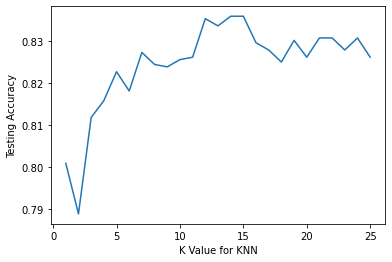

In [17]:
plt.plot(k_range,scores)
plt.xlabel("K Value for KNN")
plt.ylabel("Testing Accuracy")

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_K, weights='uniform')

In [19]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=14)

In [20]:
y_predict = knn_model.predict(X_test_scaled)

In [21]:
print(metrics.accuracy_score(y_test,y_predict))

0.835812356979405


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model

In [23]:
# Train the model with GridSearch

In [24]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)